<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Emotional Audio Sounds from 24 Diff. Actors</h1>

Hey My name is Tayyab Hussain and I am passionate to learn Data Science. Here I work on Audio Classification. This Dataset consist of 24 different actors that have speeak in different emotions.I hope you;ll learn aa lot from it, I am not a pro Data Scientist. I am also in learning Phase. Thank you very much for your love 

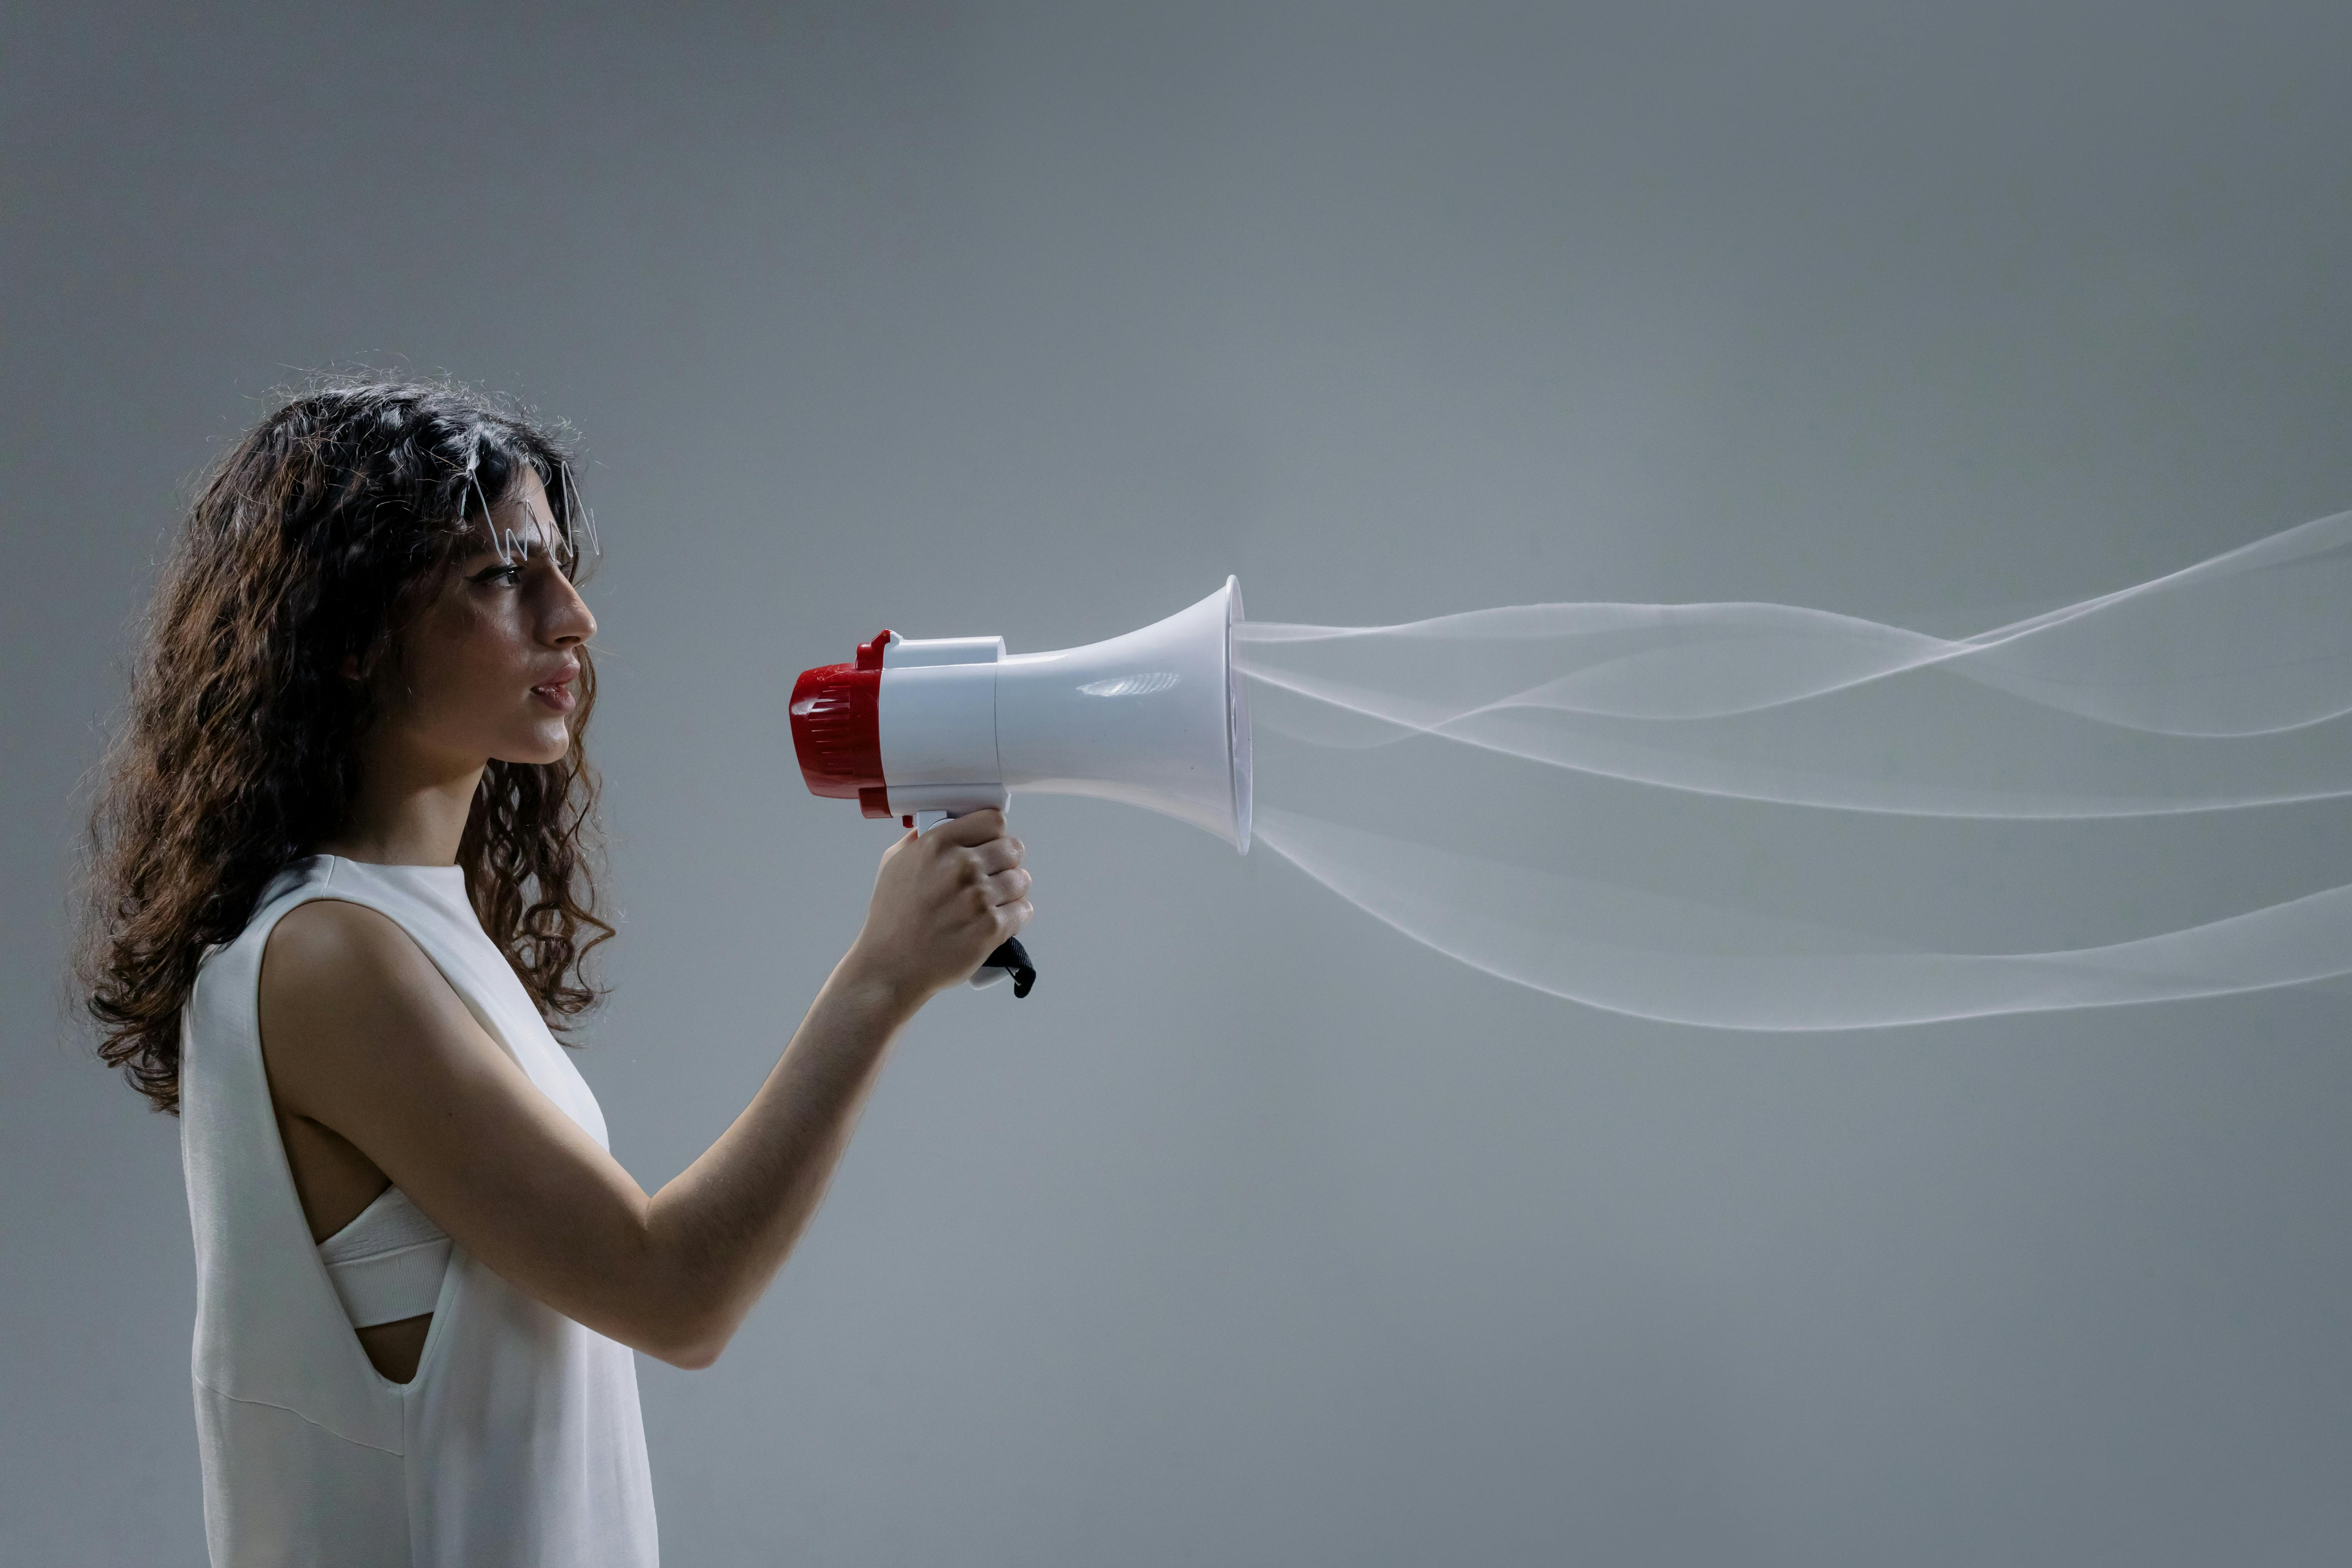

In [1]:
from IPython.display import Image, display

# Path to the uploaded image
image_path = '/kaggle/input/image-audio/pexels-cottonbro-7859937.jpg'

# Display the image
display(Image(filename=image_path))

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Import Libraries</h1>
 



In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import glob as glob
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
import seaborn as sns
import os
import csv
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Waveform and Audiio Play of first file</h1>

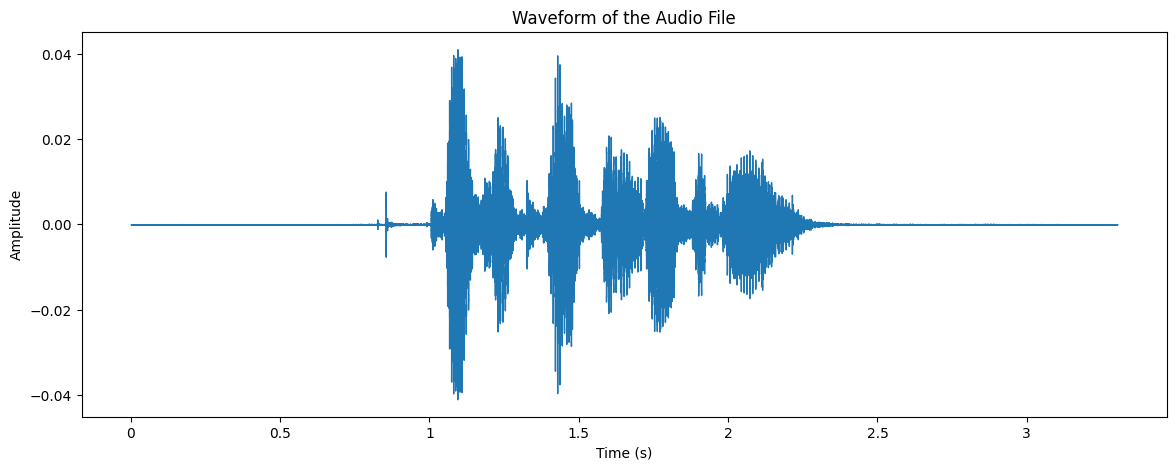

In [3]:
filename = "/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav"


librosa_audio_data, librosa_sample_rate = librosa.load(filename)

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
plt.title('Waveform of the Audio File')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio up
ipd.Audio(filename)

 `librosa_audio_data, librosa_sample_rate = librosa.load(filename)`: This loads the audio file using librosa. The librosa.load function returns two things:


`librosa_audio_data`: The actual audio data as a NumPy array.

`librosa_sample_rate`: The sample rate of the audio file, which tells you how many samples per second were recorded.

`And then plot the waveform of the data`  The x-axis represents time in seconds, and the y-axis represents the amplitude of the audio signal.

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Waveform and Spectogram</h1>

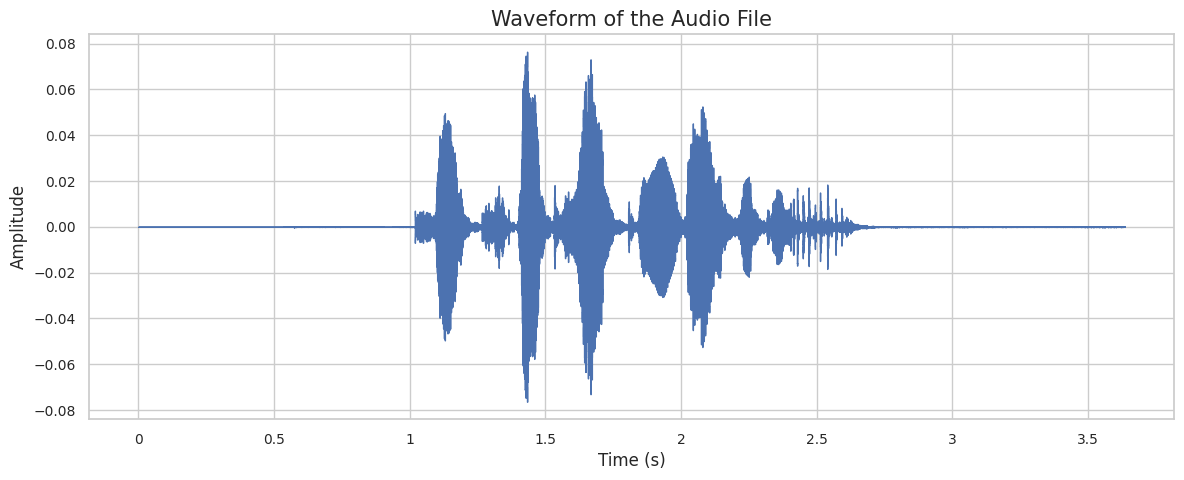

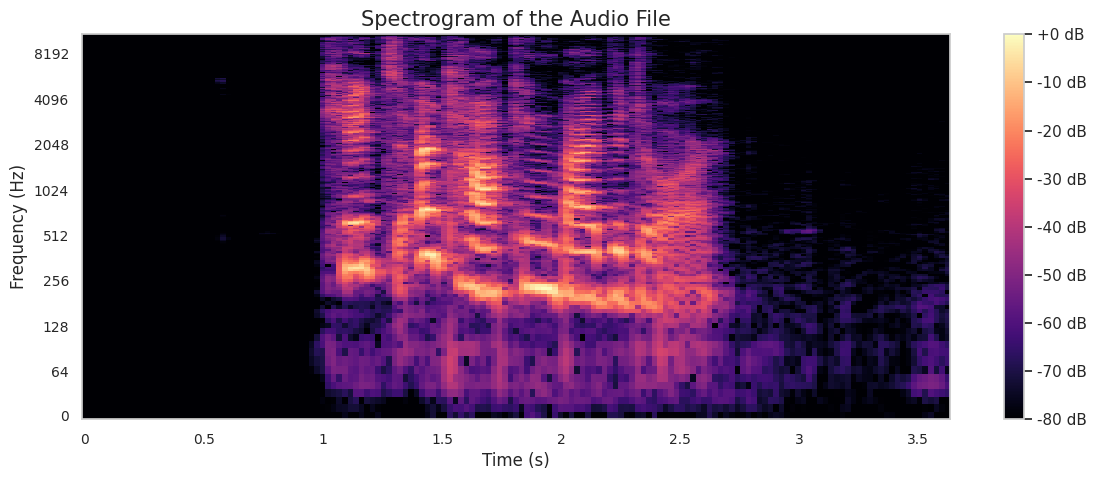

In [4]:

# Load the audio file
filename = "/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(filename)

# Set the style
sns.set(style="whitegrid")

# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
plt.title('Waveform of the Audio File', fontsize=15)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plot the spectrogram
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(librosa_audio_data)), ref=np.max)
librosa.display.specshow(D, sr=librosa_sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio File', fontsize=15)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Frequency (Hz)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Play the audio
ipd.Audio(filename)


Actually DOing the Same work But here i add the `Spectogram` of Audio File

Do you know about `spectogram`


A `spectrogram` is a visual representation of the spectrum of frequencies in a signal as it varies with time. It is commonly used in various fields such as audio signal processing, linguistics, music, and physics to analyze the properties of a signal over time.

`Here are key aspects of a spectrogram`:

* Time Axis (X-axis): Represents time.
* Frequency Axis (Y-axis): Represents frequency components.
* Intensity/Color: Represents the amplitude or power of the frequencies. Different colors or shades represent different intensity levels.

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Male vs Female Audio file</h1>

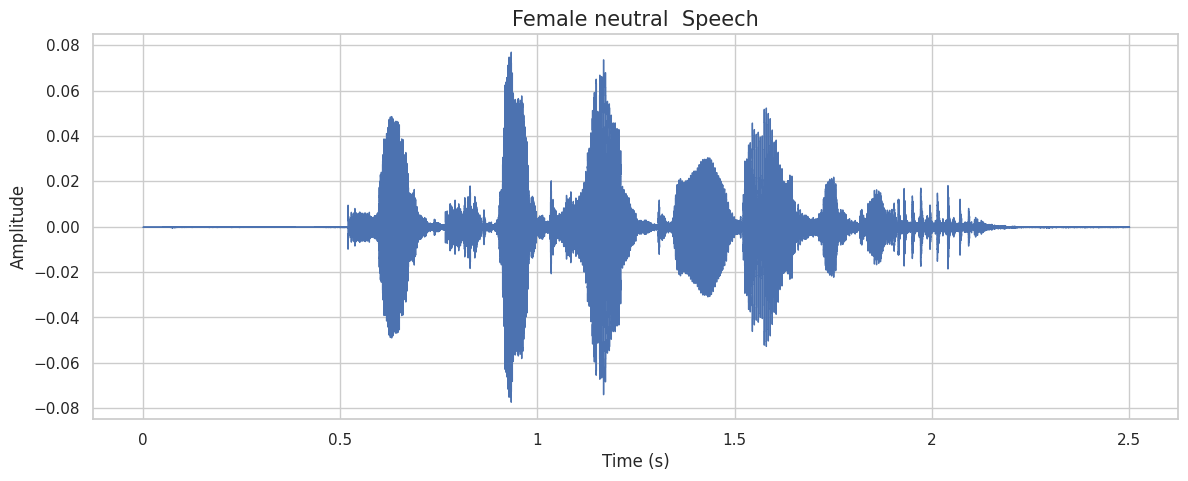

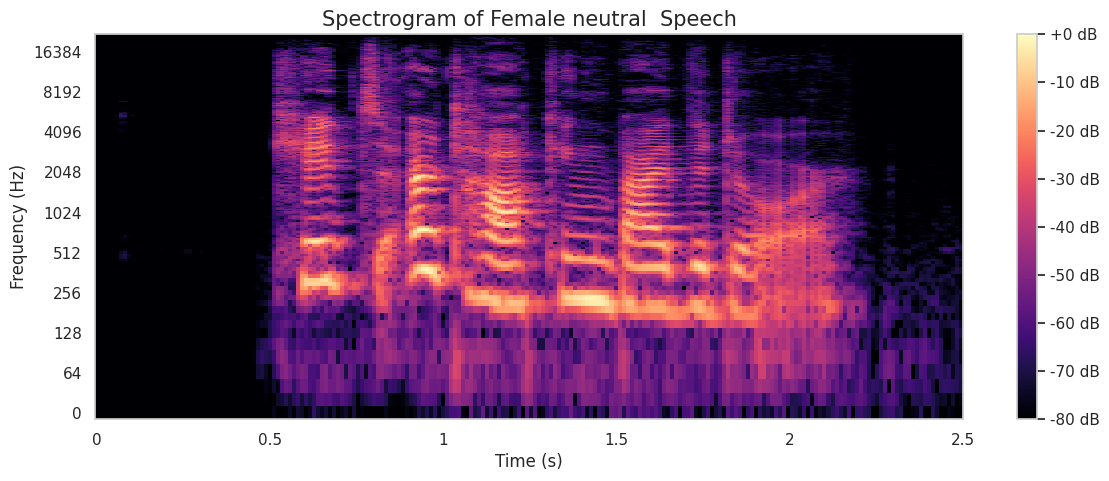

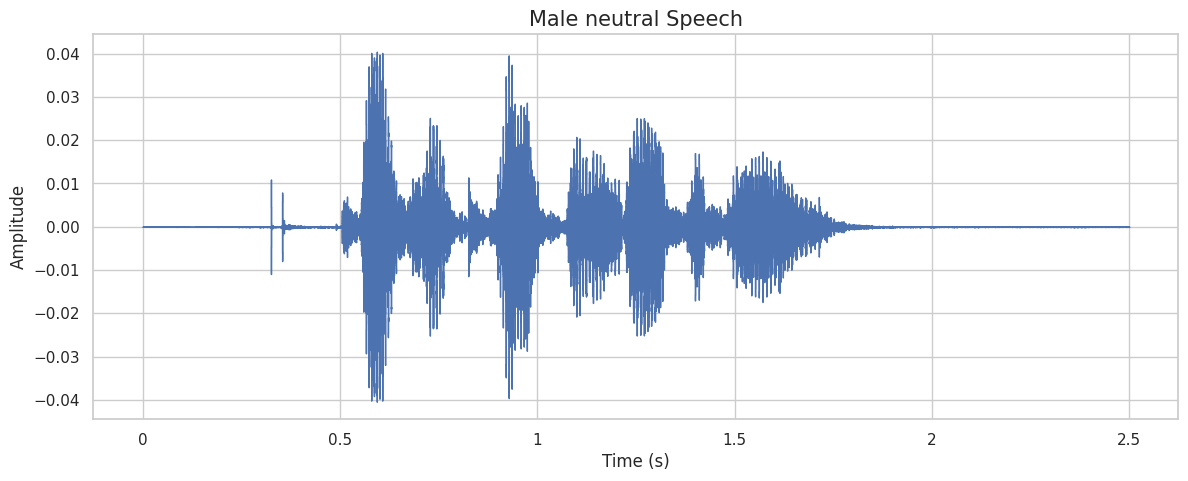

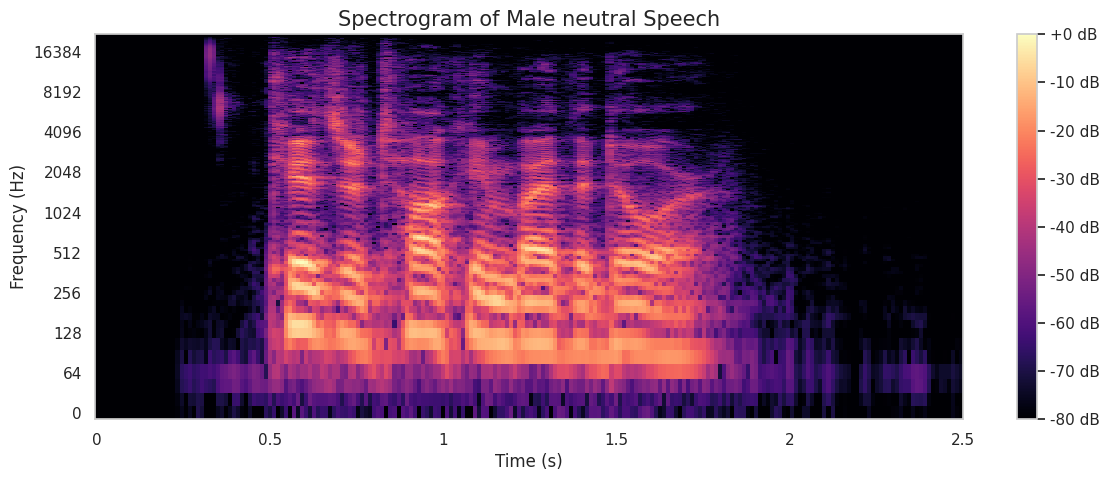

13
13


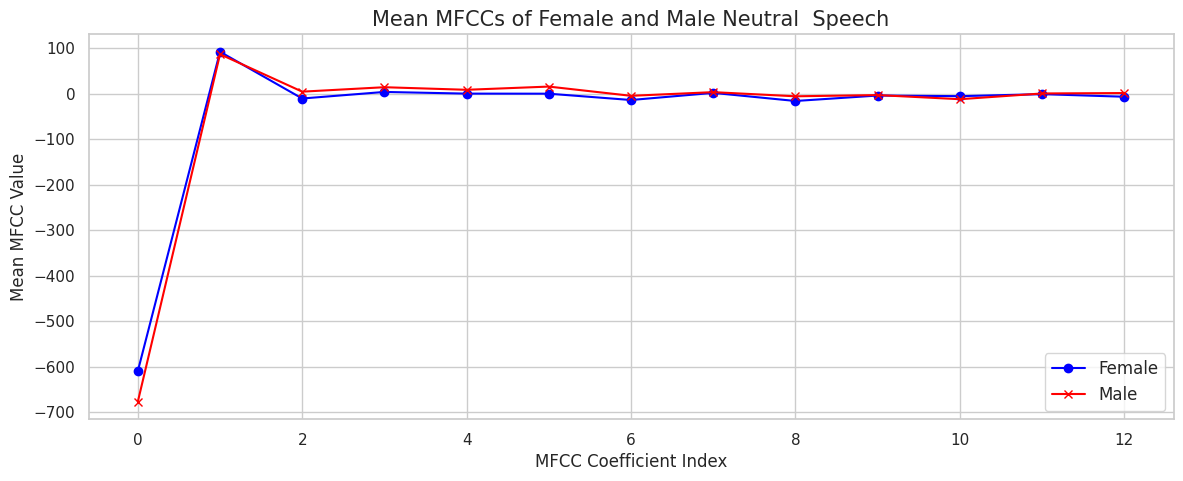

In [5]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Function to plot waveform
def plot_waveform_and_spectrogram(path, title):
    X, sample_rate = librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)
    
    plt.figure(figsize=(14, 5))
    plt.title(title, fontsize=15)
    librosa.display.waveshow(X, sr=sample_rate)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude', fontsize=12)
    plt.show()
    
    plt.figure(figsize=(14, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(X)), ref=np.max)
    librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {title}', fontsize=15)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Frequency (Hz)', fontsize=12)
    plt.show()
    
    return X, sample_rate

# Plot waveforms and spectrograms for both samples
female_path = "/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav"
male_path = "/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav"

X_female, sr_female = plot_waveform_and_spectrogram(female_path, 'Female neutral  Speech')
X_male, sr_male = plot_waveform_and_spectrogram(male_path, 'Male neutral Speech')

# Compute MFCCs and their means
female_mfcc = np.mean(librosa.feature.mfcc(y=X_female, sr=sr_female, n_mfcc=13), axis=1)
male_mfcc = np.mean(librosa.feature.mfcc(y=X_male, sr=sr_male, n_mfcc=13), axis=1)

# Print lengths (they should be 13)
print(len(female_mfcc))
print(len(male_mfcc))

ipd.Audio(female_path)

# Plot MFCCs
plt.figure(figsize=(14, 5))
plt.plot(female_mfcc, label='Female', color='blue', marker='o')
plt.plot(male_mfcc, label='Male', color='red', marker='x')
plt.title('Mean MFCCs of Female and Male Neutral  Speech', fontsize=15)
plt.xlabel('MFCC Coefficient Index', fontsize=12)
plt.ylabel('Mean MFCC Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

ipd.Audio(male_path)


`Function Definition`: This function, `plot_waveform_and_spectrogram`, takes two arguments: path (the file path to the audio file) and title (the title for the plot).

`librosa.load(path, duration=2.5, sr=22050*2, offset=0.5)`: Loads the audio file specified by path. It loads a 2.5-second segment of the audio starting 0.5 seconds into the file, with a sample rate of 44100 Hz (22050 * 2).

`Plot the waveform and Plot the Spectogram `

In the Spectogram 

`librosa.stft(X)`: Computes the Short-Time Fourier Transform (STFT) of the audio data.

`librosa.amplitude_to_db(np.abs(librosa.stft(X)), ref=np.max)`: Converts the amplitude to decibels.

`Computing MFCCs:`

`librosa.feature.mfcc(y=X_female, sr=sr_female, n_mfcc=13)`: Computes the MFCCs for the female audio data. MFCCs are a way of representing the short-term power spectrum of sound.

`np.mean(..., axis=1)`: Computes the mean of the MFCCs along the time axis.

Repeats the same for the male audio data.

`Plotting MFCCs`:

`plt.plot`: Plots the mean MFCCs for both the female and male audio data.

Adds labels, title, legend, and grid to the plot.

`plt.show()`: Displays the plot.

 <div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">MFCC Features of Only one Audio file</h1>

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 157)


In [7]:
mfccs

array([[-8.2847119e+02, -8.2847119e+02, -8.2847119e+02, ...,
        -7.9771271e+02, -8.0002814e+02, -8.0582324e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.8207043e+01,  3.5541718e+01,  2.9154484e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.6622364e+01,  2.5374130e+01,  2.2421337e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.4842749e+00,  4.3224392e+00,  4.1111302e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.2089915e+00,  2.5795212e+00,  3.5092463e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.3584270e-01,  1.7408335e+00,  2.3712184e+00]], dtype=float32)

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Create Meta Data</h1>

###  Creating Meta data of Audio Dataset is become challenge for me . But i accept the challenge and create Meta Data of it

In [8]:
# Directory containing audio files
audio_dir = '/kaggle/input/ravdess-emotional-speech-audio'

# Output metadata CSV file
metadata_file = '/kaggle/working/metadata.csv'

# Map emotion codes to labels
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Open the metadata file for writing
with open(metadata_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Filename', 'Actor', 'Emotion', 'EmotionIntensity', 'Statement', 'Repetition'])

    # Iterate over actor directories
    for actor_dir in sorted(os.listdir(audio_dir)):
        actor_path = os.path.join(audio_dir, actor_dir)
        if os.path.isdir(actor_path):
            actor_id = actor_dir.split('_')[1]
            # Iterate over audio files in the actor directory
            for filename in sorted(os.listdir(actor_path)):
                if filename.endswith('.wav'):
                    parts = filename.split('-')
                    if len(parts) == 7:
                        emotion = emotion_map[parts[2]]
                        intensity = parts[3]
                        statement = parts[4]
                        repetition = parts[5]
                        writer.writerow([filename, actor_id, emotion, intensity, statement, repetition])

# Load the metadata to verify
MD = pd.read_csv(metadata_file)
MD.head()


Filename  Actor  Emotion  EmotionIntensity  Statement  \
0  03-01-01-01-01-01-01.wav      1  neutral                 1          1   
1  03-01-01-01-01-02-01.wav      1  neutral                 1          1   
2  03-01-01-01-02-01-01.wav      1  neutral                 1          2   
3  03-01-01-01-02-02-01.wav      1  neutral                 1          2   
4  03-01-02-01-01-01-01.wav      1     calm                 1          1   

   Repetition  
0           1  
1           2  
2           1  
3           2  
4           1

`import os`: This imports the os module, which provides functions to interact with the operating system, such as reading directories and file paths.`

import csv:` This imports the csv module, which allows for reading from and writing to CSV (Comma Separated Values) files.

`audio_dir`: Specifies the directory containing the audio files.

`metadata_file`: Specifies the path where the metadata CSV file will be saved.

`emotion_map`: A dictionary that maps emotion codes (found in the filenames) to their corresponding emotion labels.

`with open(metadata_file, 'w', newline='') as csvfile`: Opens the metadata file in write mode. The newline='' argument avoids adding extra newline characters.

`writer = csv.writer(csvfile)`: Creates a CSV writer object.

`writer.writerow(['Filename', 'Actor', 'Emotion', 'EmotionIntensity', 'Statement', 'Repetition'])`: Writes the header row to the CSV file.

`for actor_dir in sorted(os.listdir(audio_dir))`: Lists all items in the audio_dir and iterates over them, sorted alphabetically.

`actor_path = os.path.join(audio_dir, actor_dir)`: Constructs the full path to the actor directory.

`if os.path.isdir(actor_path)`: Checks if the path is a directory.

`actor_id = actor_dir.split('_')[1]`: Extracts the actor ID from the directory name by splitting it at the underscore and taking the second part.

`for filename in sorted(os.listdir(actor_path))`: Lists all files in the actor directory and iterates over them, sorted alphabetically.

`if filename.endswith('.wav')`: Checks if the file is a WAV audio file.

`parts = filename.split('-')`: Splits the filename into parts using the hyphen as the delimiter.

`if len(parts) == 7`: Checks if the filename has exactly 7 parts, which ensures it follows the expected naming convention.

`emotion = emotion_map[parts[2]]`: Maps the emotion code to the corresponding emotion label using emotion_map.

`intensity = parts[3]`: Extracts the emotion intensity from the filename.

`statement = parts[4]`: Extracts the statement code from the filename.

`repetition = parts[5]`: Extracts the repetition code from the filename.

`writer.writerow([filename, actor_id, emotion, intensity, statement, repetition])`: Writes a row to the CSV file with the extracted metadata.

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">MetaData Columns Explaination</h1>



`Filename`:

This column contains the name of the audio file. For example, 03-01-01-01-01-01-01.wav.


`Actor`:

This column indicates the ID of the actor who performed the speech. The ID is extracted from the actor directory name.

`Emotion`:

This column represents the emotion conveyed in the audio file. The emotion is derived from the filename and mapped using the emotion_map dictionary:
* 01 -> neutral
* 02 -> calm
*  03 -> happy
*  04 -> sad
* 05 -> angry
* 06 -> fearful
* 07 -> disgust
* 08 -> surprised


`EmotionIntensity`:

This column indicates the intensity of the emotion. In the RAVDESS dataset, this value is typically:
* 01 for normal intensity
* 02 for strong intensity


`Statement`:

This column represents the specific statement being spoken in the audio file. In the RAVDESS dataset, there are two statements:
* 01 for the first statement
* 02 for the second statement

`Repetition`:

This column indicates the repetition of the statement. Each statement is repeated twice by each actor:
* 01 for the first repetition
* 02 for the second repetition

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Extraction of Features through MFCCS </h1>

In [9]:
# Directory containing audio files
audio_dir = '/kaggle/input/ravdess-emotional-speech-audio'

# Output metadata CSV file
metadata_file = '/kaggle/working/metadata_with_mfcc.csv'



# Function to extract MFCC features from an audio file
def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

# List to hold metadata and features
metadata_with_features = []

# Iterate over actor directories
for actor_dir in sorted(os.listdir(audio_dir)):
    actor_path = os.path.join(audio_dir, actor_dir)
    if os.path.isdir(actor_path):
        actor_id = actor_dir.split('_')[1]
        # Iterate over audio files in the actor directory
        for filename in sorted(os.listdir(actor_path)):
            if filename.endswith('.wav'):
                file_path = os.path.join(actor_path, filename)
                parts = filename.split('-')
                if len(parts) == 7:
                    emotion = emotion_map[parts[2]]
                    intensity = parts[3]
                    statement = parts[4]
                    repetition = parts[5]
                    
                    # Extract MFCC features
                    mfcc_features = extract_mfcc(file_path)
                    
                    # Append metadata and features
                    metadata_with_features.append([filename, actor_id, emotion, intensity, statement, repetition] + list(mfcc_features))

# Convert to DataFrame
columns = ['Filename', 'Actor', 'Emotion', 'EmotionIntensity', 'Statement', 'Repetition'] + [f'MFCC_{i}' for i in range(1, 14)]
MDF = pd.DataFrame(metadata_with_features, columns=columns)

# Save to CSV
MDF.to_csv(metadata_file, index=False)

# Display the first few rows to verify
MDF.head()


Filename Actor  Emotion EmotionIntensity Statement  \
0  03-01-01-01-01-01-01.wav    01  neutral               01        01   
1  03-01-01-01-01-02-01.wav    01  neutral               01        01   
2  03-01-01-01-02-01-01.wav    01  neutral               01        02   
3  03-01-01-01-02-02-01.wav    01  neutral               01        02   
4  03-01-02-01-01-01-01.wav    01     calm               01        01   

  Repetition      MFCC_1     MFCC_2    MFCC_3     MFCC_4    MFCC_5    MFCC_6  \
0         01 -697.792603  54.890038  0.663467  12.435785  7.733953  0.530750   
1         02 -692.855774  55.363899 -1.548319  16.038305  8.818810 -0.146586   
2         01 -691.587891  58.024662  0.159465  13.624650  5.374113  1.162336   
3         02 -685.105469  55.879421  2.783262  13.252023  6.989669  2.981274   
4         01 -727.104370  62.355034  3.121181  15.064669  8.132436  1.927083   

     MFCC_7    MFCC_8     MFCC_9   MFCC_10   MFCC_11   MFCC_12   MFCC_13  
0 -3.216631 -3.159395 -10.977551 -2.848711  0.815298 -3.037067  1.955447  
1 -1.373392 -5.293180 -11.623182 -1.348284  0.843716 -2.641279  1.017251  
2 -2.083359 -5.382584 -10.332823 -3.662082  0.560603 -2.838227  1.834786  
3 -1.586030 -6.961661 -10.348489 -3.270768  1.176165 -1.498656  0.551550  
4 -3.274656 -3.761793  -9.750298 -4.853837  0.996317 -3.116071  0.546320

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Extracted Features are in one column</h1>

In [10]:
# Load the CSV with extracted MFCC features
MDF = pd.read_csv('/kaggle/working/metadata_with_mfcc.csv')

# Combine MFCC features into a single column
MDF['MFCC_Features'] = MDF.iloc[:, 6:].values.tolist()

# Drop the individual MFCC columns if you only need the combined column
MDCF = MDF.drop(columns=[f'MFCC_{i}' for i in range(1, 14)])

# Save the updated DataFrame to a new CSV file
output_file = '/kaggle/working/metadata_combined_mfcc.csv'
MDCF.to_csv(output_file, index=False)

# Display the first few rows to verify
MDCF.head()


Filename  Actor  Emotion  EmotionIntensity  Statement  \
0  03-01-01-01-01-01-01.wav      1  neutral                 1          1   
1  03-01-01-01-01-02-01.wav      1  neutral                 1          1   
2  03-01-01-01-02-01-01.wav      1  neutral                 1          2   
3  03-01-01-01-02-02-01.wav      1  neutral                 1          2   
4  03-01-02-01-01-01-01.wav      1     calm                 1          1   

   Repetition                                      MFCC_Features  
0           1  [-697.7926, 54.890038, 0.66346693, 12.435785, ...  
1           2  [-692.8558, 55.3639, -1.5483189, 16.038305, 8....  
2           1  [-691.5879, 58.024662, 0.15946512, 13.62465, 5...  
3           2  [-685.10547, 55.87942, 2.7832618, 13.252023, 6...  
4           1  [-727.1044, 62.355034, 3.121181, 15.064669, 8....

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Visulize MFCCS</h1>

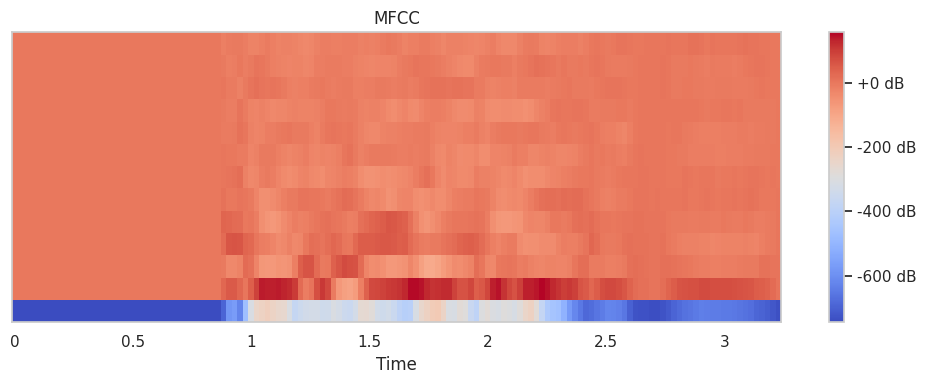

In [11]:
# Function to visualize MFCC spectrogram
def visualize_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

# Example usage with a single file
example_file = '/kaggle/input/ravdess-emotional-speech-audio/Actor_03/03-01-08-02-02-02-03.wav'
visualize_mfcc(example_file)

`def visualize_mfcc(file_path`, n_mfcc=13):: This defines a function called visualize_mfcc that takes two arguments:
* `file_path`: The path to the audio file to be visualized.
* `n_mfcc`: The number of MFCCs to compute (default is 13).

`librosa.load(file_path)`: Loads the audio file specified by file_path. It returns:
* `y`: The audio time series as a NumPy array.
* `sr`: The sample rate of the audio file.

`librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)`: Computes the Mel-frequency cepstral coefficients (MFCCs) for the audio time series y with the given sample rate sr and number of MFCCs n_mfcc.

`librosa.display.specshow(mfccs, x_axis='time', sr=sr)`: Displays the MFCC spectrogram. The x_axis='time' argument labels the x-axis with time, and sr=sr provides the sample rate.


`example_file`: Defines a variable example_file with the path to an example audio file.

`visualize_mfcc(example_file)`: Calls the visualize_mfcc function with example_file as the argument, which generates and displays the MFCC spectrogram for this audio file

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">MFCCS Features Normalization </h1>

In [12]:
# Load the CSV with combined MFCC features
MDCF= pd.read_csv('/kaggle/working/metadata_combined_mfcc.csv')

# Convert the combined MFCC features from string to list (if needed)
MDCF['MFCC_Features'] = MDCF['MFCC_Features'].apply(eval)

# Extract the MFCC features
mfcc_features = np.array(MDCF['MFCC_Features'].tolist())

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the MFCC features
mfcc_features_normalized = scaler.fit_transform(mfcc_features)

# Update the DataFrame with normalized features
MDCF['MFCC_Features_Normalized'] = mfcc_features_normalized.tolist()

# Save the updated DataFrame to a new CSV file
output_file = '/kaggle/working/metadata_normalized_mfcc.csv'
MDCF.to_csv(output_file, index=False)

# Display the first few rows to verify
MDCF.head()


Filename  Actor  Emotion  EmotionIntensity  Statement  \
0  03-01-01-01-01-01-01.wav      1  neutral                 1          1   
1  03-01-01-01-01-02-01.wav      1  neutral                 1          1   
2  03-01-01-01-02-01-01.wav      1  neutral                 1          2   
3  03-01-01-01-02-02-01.wav      1  neutral                 1          2   
4  03-01-02-01-01-01-01.wav      1     calm                 1          1   

   Repetition                                      MFCC_Features  \
0           1  [-697.7926, 54.890038, 0.66346693, 12.435785, ...   
1           2  [-692.8558, 55.3639, -1.5483189, 16.038305, 8....   
2           1  [-691.5879, 58.024662, 0.15946512, 13.62465, 5...   
3           2  [-685.10547, 55.87942, 2.7832618, 13.252023, 6...   
4           1  [-727.1044, 62.355034, 3.121181, 15.064669, 8....   

                            MFCC_Features_Normalized  
0  [0.27685894956225177, 0.5908986735091201, 0.67...  
1  [0.2859225317811953, 0.5955467545745683, 0.645...  
2  [0.28825029792432444, 0.6216459933231155, 0.66...  
3  [0.30015153704350017, 0.6006034562110361, 0.69...  
4  [0.2230447563024005, 0.6641223263051802, 0.701...

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">PCA of MFCCS</h1>

In [13]:
# Load the CSV with extracted MFCC features
MDCF = pd.read_csv('/kaggle/working/metadata_with_mfcc.csv')

# Extract MFCC features
X = MDCF.iloc[:, 6:].values

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=8, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = y_kmeans

# Plot using Plotly
fig = px.scatter(df_pca, x='Principal Component 1', y='Principal Component 2',
                 color='Cluster', title='PCA of MFCC Features with KMeans Clustering',
                 labels={'Principal Component 1': 'Principal Component 1', 'Principal Component 2': 'Principal Component 2'},
                 color_continuous_scale='Viridis')

fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=15,
    yaxis_title_font_size=15,
    legend_title_font_size=15,
    template='plotly_white'
)

fig.show()


**What is PCA of MFCC Features?**

`Principal Component Analysis (PCA)` is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while preserving as much variance as possible. When applied to MFCC features:

`MFCC (Mel-Frequency Cepstral Coefficients)`: These are features extracted from audio signals that represent the short-term power spectrum of sound. They are commonly used in audio and speech processing.

`PCA of MFCC features`: PCA is applied to the MFCC features to reduce their dimensionality. This means transforming the original MFCC features (which might have many dimensions) into a smaller set of dimensions (principal components) that capture the most significant patterns in the data.
Principal Component 1 and Principal Component 2

`Principal Component 1 (PC1)`: The first principal component is the direction in the original data space along which the variance of the data is maximized. It captures the most significant variation in the data.

`Principal Component 2 (PC2)`: The second principal component is orthogonal to the first and captures the second most significant variation in the data. Together with PC1, it forms a new coordinate system that describes the data in a lower-dimensional space.

By plotting PC1 and PC2, we can visualize the most important patterns and clusters in the data, which might be difficult to discern in the higher-dimensional original space.

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Conclusion </h1>


This is the part 1 of the Emotion Audio Classification. In the nec=xt part Insha'Allah I'll build the model for audio classification. So stay tunned with me

<div style="padding:20px; border-radius:10px; margin-bottom:20px; border: 2px solid #2E86C1;">
    <h1 style="color:#2E86C1; text-align:center; font-size:48px; font-weight:bold; font-family: 'Lucida Handwriting', cursive;">Thanks </h1>

Thank you very much for viewing this notebook . I hope you'll like the notebook and learn a lot from it .